In [70]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report



In [71]:
df=pd.read_csv('transaction_anomalies_dataset.csv')

In [72]:
df.head(5)

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings


In [73]:
df.isnull().sum()

Transaction_ID                 0
Transaction_Amount             0
Transaction_Volume             0
Average_Transaction_Amount     0
Frequency_of_Transactions      0
Time_Since_Last_Transaction    0
Day_of_Week                    0
Time_of_Day                    0
Age                            0
Gender                         0
Income                         0
Account_Type                   0
dtype: int64

The dataset is clean and it do not have any null value in it

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


In [75]:
# descripyive statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_Amount,1000.0,1038.122511,283.580055,849.024392,966.028796,1002.118678,1.033144e+03,3.227459e+03
Transaction_Volume,1000.0,2.498000,1.115006,1.000000,1.000000,3.000000,3.000000e+00,4.000000e+00
Average_Transaction_Amount,1000.0,1000.682506,20.632334,939.081423,986.800556,1000.501902,1.015156e+03,1.073154e+03
Frequency_of_Transactions,1000.0,12.078000,4.245225,5.000000,8.000000,12.000000,1.600000e+01,1.900000e+01
Time_Since_Last_Transaction,1000.0,15.341000,8.361258,1.000000,8.000000,16.000000,2.200000e+01,2.900000e+01
Age,1000.0,40.641000,13.819953,18.000000,29.000000,41.000000,5.300000e+01,6.400000e+01
Income,1000.0,894823.839000,345356.222598,300159.000000,591730.750000,887664.500000,1.178102e+06,1.499670e+06


HERE is the descriptive statistics of the data of all the columns

C:\Users\jibra\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\jibra\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x600 with 0 Axes>

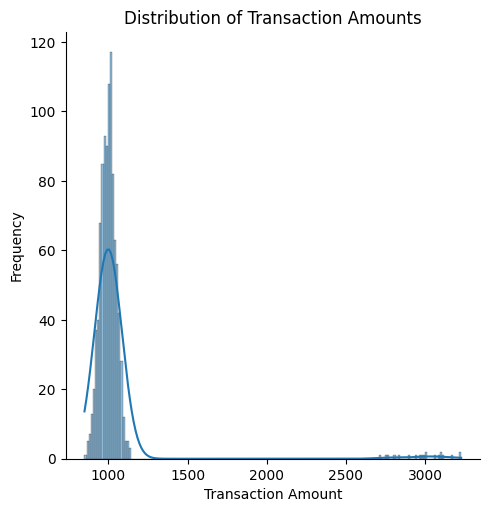

In [76]:
plt.figure(figsize=(10, 6))
sns.displot(data=df, x='Transaction_Amount', kde=True)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.show()


The columns Transaction Amount is right skew as most value is in the range of 1k but some amounts are also 3k 

**Check distribution of transactions amount in the data**

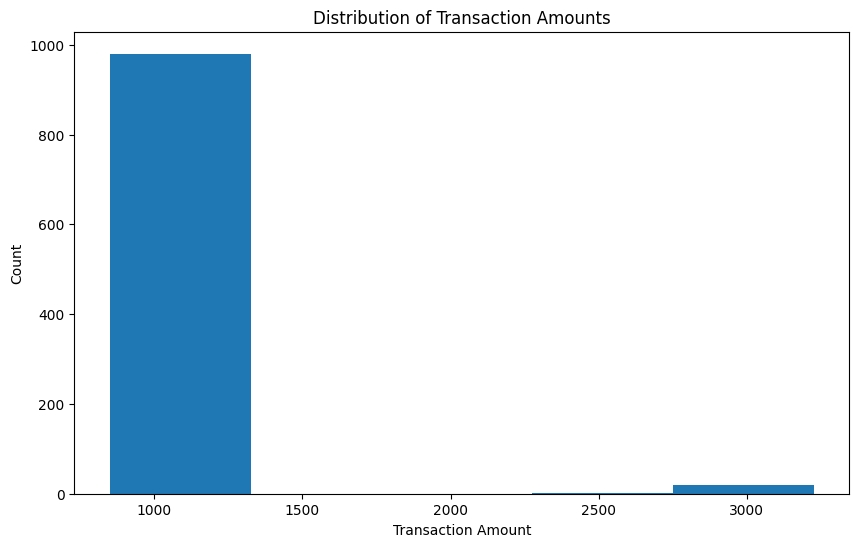

Bin Edges: [ 849.02439221 1324.71133542 1800.39827864 2276.08522186 2751.77216507
 3227.45910829]
Counts: [980   0   0   1  19]


In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Create the histogram
counts, bin_edges = np.histogram(df['Transaction_Amount'], bins=5)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Transaction_Amount'], bins=5)
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.title('Distribution of Transaction Amounts')
plt.show()

# Print the bin edges and counts
print("Bin Edges:", bin_edges)
print("Counts:", counts)

**Distribution of transactions amount by account type**


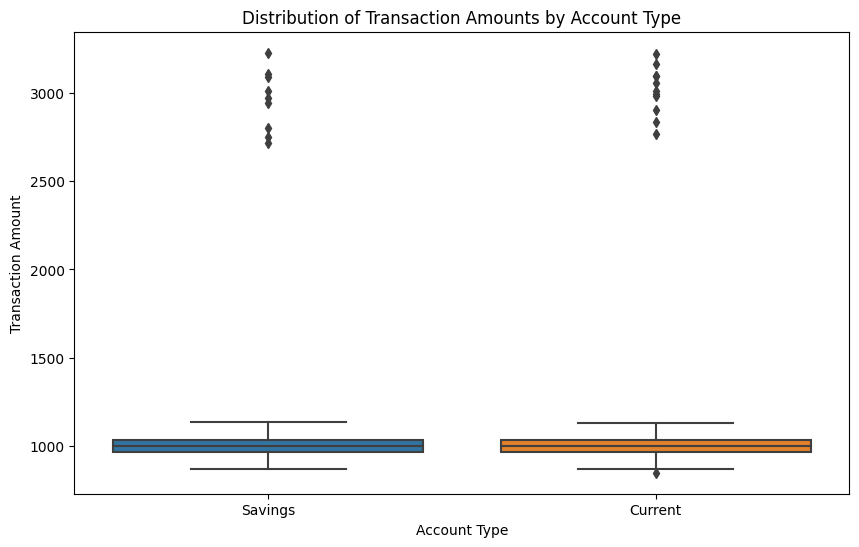

In [78]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Account_Type', y='Transaction_Amount')
plt.xlabel('Account Type')
plt.ylabel('Transaction Amount')
plt.title('Distribution of Transaction Amounts by Account Type')
plt.show()


**Average transaction amount by age**

In [79]:
fig = px.scatter(df, x='Age', y='Average_Transaction_Amount', color='Account_Type')

fig.update_layout(
    title='Average Transaction Amount by Age',
    xaxis_title='Age',
    yaxis_title='Average Transaction Amount'
)

# Calculate the average transaction amount for each account type
average_saving = df[df['Account_Type'] == 'Savings']['Average_Transaction_Amount'].mean()
average_current = df[df['Account_Type'] == 'Current']['Average_Transaction_Amount'].mean()

# Add separate line traces for each average amount
fig.add_trace(go.Scatter(
    x=df[df['Account_Type'] == 'Savings']['Age'],
    y=[average_saving] * len(df[df['Account_Type'] == 'Savings']),
    mode='lines',
    name='Average (Saving)',
    line=dict(width=2)
))

fig.add_trace(go.Scatter(
    x=df[df['Account_Type'] == 'Current']['Age'],
    y=[average_current] * len(df[df['Account_Type'] == 'Current']),
    mode='lines',
    name='Average (Current)',
    line=dict(width=2)
))

fig.show()

**Transactions count by day of the week**

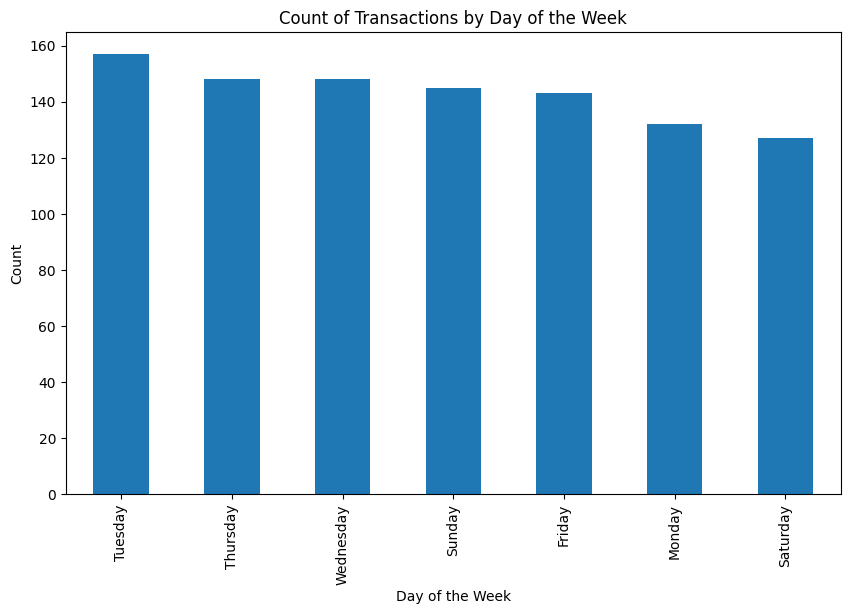

Day_of_Week
Tuesday      157
Thursday     148
Wednesday    148
Sunday       145
Friday       143
Monday       132
Saturday     127
Name: count, dtype: int64


In [80]:
transaction_count_by_day = df['Day_of_Week'].value_counts()
plt.figure(figsize=(10, 6))
transaction_count_by_day.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Count of Transactions by Day of the Week')
plt.show()
print(transaction_count_by_day)


In [81]:
df.head(5)

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


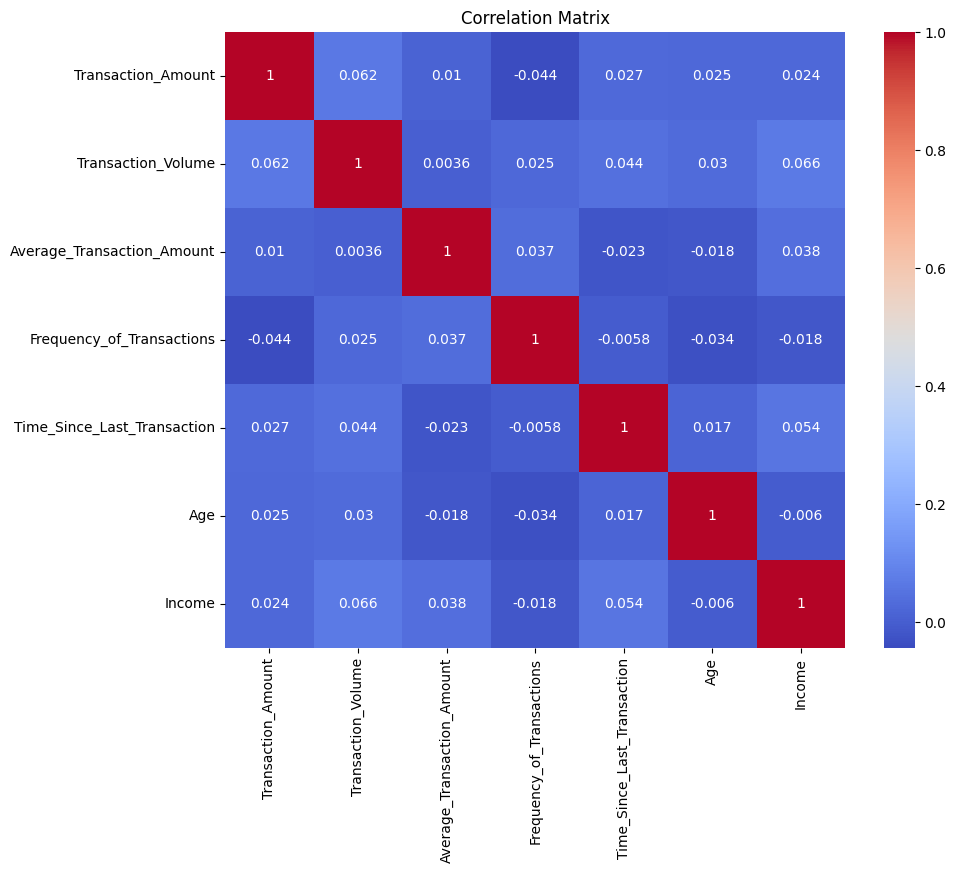

In [83]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'int32','float64']).columns
numeric_df = df[numeric_columns]

# Calculate correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [84]:
from sklearn.ensemble import IsolationForest

# Extract the 'Transaction_Amount' column
transaction_amount = df['Transaction_Amount'].values.reshape(-1, 1)

# Initialize Isolation Forest model
model = IsolationForest(contamination=0.02, random_state=42)

# Fit the model
model.fit(transaction_amount)

# Predict outliers (anomalies)
outliers = model.predict(transaction_amount)

# Count the number of anomalies
num_anomalies = sum(outliers == -1)

# Calculate the ratio of anomalies
anomaly_ratio = num_anomalies / len(df)

print(f"Number of anomalies in Transaction_Amount: {num_anomalies}")
print(f"Anomaly ratio in Transaction_Amount: {anomaly_ratio:.2%}")


Number of anomalies in Transaction_Amount: 20
Anomaly ratio in Transaction_Amount: 2.00%


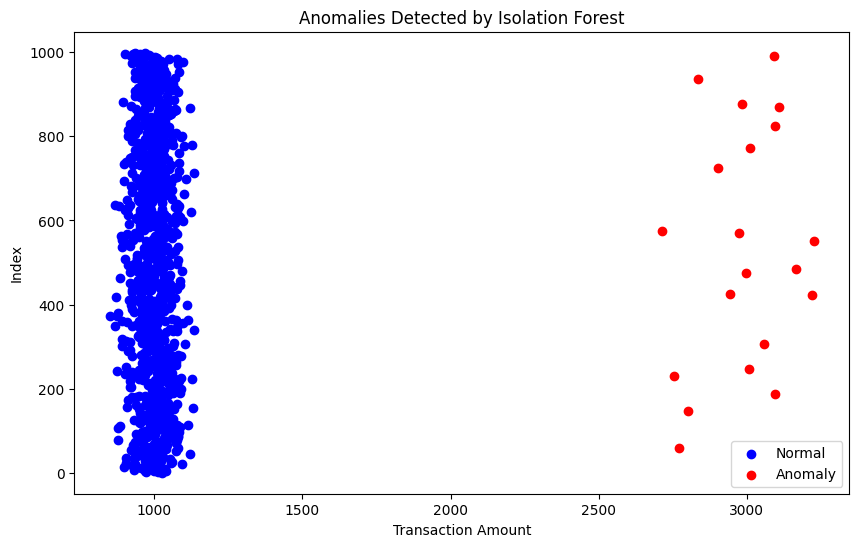

In [85]:

# Add a new column 'Is_Anomaly' to the DataFrame to indicate anomalies
df['Is_Anomaly'] = outliers == -1

# Plotting normal and anomalous points
plt.figure(figsize=(10, 6))

# Plot normal points in blue
plt.scatter(df['Transaction_Amount'][~df['Is_Anomaly']], df.index[~df['Is_Anomaly']], c='blue', label='Normal')

# Plot anomalies in red
plt.scatter(df['Transaction_Amount'][df['Is_Anomaly']], df.index[df['Is_Anomaly']], c='red', label='Anomaly')

plt.xlabel('Transaction Amount')
plt.ylabel('Index')
plt.title('Anomalies Detected by Isolation Forest')
plt.legend()
plt.show()


In [86]:
pd.value_counts(outliers )

C:\Users\jibra\AppData\Local\Temp\ipykernel_9576\2928223127.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



 1    980
-1     20
Name: count, dtype: int64

In [87]:
df.head(5)

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type,Is_Anomaly
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings,False
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings,False
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings,False
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings,False
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings,False


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Ignore undefined metric warning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Assuming df is your DataFrame with the selected numeric columns

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'int32', 'float64']).columns

# Extract numeric data
X = df[numeric_columns]

# Initialize Isolation Forest model
model = IsolationForest(n_jobs=4, contamination=0.2, random_state=42)

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Fit the model on the training set
model.fit(X_train)

# Predict outliers (anomalies) on the testing set
outliers_test = model.predict(X_test)

# Convert predictions to binary labels (1 for normal, -1 for anomaly)
predicted_labels = np.where(outliers_test == 1, 0, 1)

# Evaluate the model using a confusion matrix and classification report
conf_matrix = confusion_matrix(np.ones(len(X_test)), predicted_labels)
classification_rep = classification_report(np.ones(len(X_test)), predicted_labels, zero_division=1)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Confusion Matrix:
[[  0   0]
 [156  44]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      1.00      0.00         0
         1.0       1.00      0.22      0.36       200

    accuracy                           0.22       200
   macro avg       0.50      0.61      0.18       200
weighted avg       1.00      0.22      0.36       200



In [89]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'int32', 'float64']).columns

# Select object columns
object_columns = df.select_dtypes(include=['object']).columns

# Extract numeric data
X_numeric = df[numeric_columns]

# Extract object data
X_object = df[object_columns].copy()  # Create a copy to avoid SettingWithCopyWarning

# Initialize a dictionary to store label encoders for each object column
label_encoders = {}

# Apply LabelEncoder to object columns
for column in X_object.columns:
    # Create a new label encoder for each column
    encoder = LabelEncoder()
    
    # Fit and transform the label encoder on the original column
    X_object[column] = encoder.fit_transform(X_object[column])
    
    # Store the label encoder in the dictionary
    label_encoders[column] = encoder

# Concatenate numeric and encoded object data
X = pd.concat([X_numeric, X_object], axis=1)

# Initialize Isolation Forest model
model = IsolationForest(n_jobs=4, contamination='auto', random_state=42)

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Fit the model on the training set
model.fit(X_train)

# Predict outliers (anomalies) on the testing set
outliers_test = model.predict(X_test)

# Convert predictions to binary labels (1 for normal, -1 for anomaly)
predicted_labels = np.where(outliers_test == 1, 0, 1)

# Evaluate the model using a confusion matrix and classification report
conf_matrix = confusion_matrix(np.ones(len(X_test)), predicted_labels)
classification_rep = classification_report(np.ones(len(X_test)), predicted_labels, zero_division=1)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Confusion Matrix:
[[  0   0]
 [ 51 149]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      1.00      0.00         0
         1.0       1.00      0.74      0.85       200

    accuracy                           0.74       200
   macro avg       0.50      0.87      0.43       200
weighted avg       1.00      0.74      0.85       200



In [90]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Initialize an Isolation Forest model
model = IsolationForest(n_jobs=4, contamination='auto', random_state=42)

# Fit the model on the training set
model.fit(X_train)

# Extract the average path lengths for each feature
average_path_lengths = -np.mean(model.decision_function(X_train), axis=0)

# Display feature importance
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': average_path_lengths})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)


                        Feature  Importance
0            Transaction_Amount    0.013439
1            Transaction_Volume    0.013439
2    Average_Transaction_Amount    0.013439
3     Frequency_of_Transactions    0.013439
4   Time_Since_Last_Transaction    0.013439
5                           Age    0.013439
6                        Income    0.013439
7                Transaction_ID    0.013439
8                   Day_of_Week    0.013439
9                   Time_of_Day    0.013439
10                       Gender    0.013439
11                 Account_Type    0.013439


In [91]:
df.columns

Index(['Transaction_ID', 'Transaction_Amount', 'Transaction_Volume',
       'Average_Transaction_Amount', 'Frequency_of_Transactions',
       'Time_Since_Last_Transaction', 'Day_of_Week', 'Time_of_Day', 'Age',
       'Gender', 'Income', 'Account_Type', 'Is_Anomaly'],
      dtype='object')

In [92]:
# Extract the features
X = df[['Transaction_Amount', 'Average_Transaction_Amount', 'Frequency_of_Transactions']]

# Initialize Isolation Forest model
model = IsolationForest(n_jobs=4, contamination=0.2, random_state=42)

# Fit the model on the specified features
model.fit(X)

# Now, for prediction, you can use the same features
# Assuming these are the feature values for a single instance
transaction_amount = 2769.890232
average_transaction_amount = 1007.261392	
frequency_of_transactions = 17

# Create a DataFrame with the features for prediction
features_to_predict = pd.DataFrame({
    'Transaction_Amount': [transaction_amount],
    'Average_Transaction_Amount': [average_transaction_amount],
    'Frequency_of_Transactions': [frequency_of_transactions]
})

# Predict outliers (anomalies) for the specified features
outliers_predicted = model.predict(features_to_predict)

# Convert predictions to binary labels (0 for normal, 1 for anomaly)
predicted_label_instance = np.where(outliers_predicted == 1, 0, 1)

# Print the predicted label for the specified features
print(f"Predicted Label for the Instance:{predicted_label_instance[0]}")



Predicted Label for the Instance:1


In [93]:
selected_columns = ['Transaction_ID', 'Transaction_Amount', 'Average_Transaction_Amount', 'Frequency_of_Transactions', 'Is_Anomaly']
filtered_df = df[df['Is_Anomaly'] == False][selected_columns]


In [94]:
filtered_df.head(5)

,Transaction_ID,Transaction_Amount,Average_Transaction_Amount,Frequency_of_Transactions,Is_Anomaly
0,TX0,1024.835708,997.234714,12,False
1,TX1,1013.952065,1020.210306,7,False
2,TX2,970.956093,989.496604,5,False
3,TX3,1040.822254,969.522480,16,False
4,TX4,998.777241,1007.111026,7,False


In [95]:
selected_columns = ['Transaction_ID', 'Transaction_Amount', 'Average_Transaction_Amount', 'Frequency_of_Transactions', 'Is_Anomaly']
filter_df = df[df['Is_Anomaly'] == True][selected_columns]

In [96]:
filter_df.head(5)

,Transaction_ID,Transaction_Amount,Average_Transaction_Amount,Frequency_of_Transactions,Is_Anomaly
59,TX59,2769.890232,1007.261392,17,True
147,TX147,2802.097817,995.475096,12,True
188,TX188,3094.817415,980.424667,6,True
230,TX230,2752.637650,1020.914703,11,True
246,TX246,3008.497489,1010.593855,16,True


In [99]:
import pickle

# Save the model to a file
model_filename = 'isolation_forest_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)

print(f"Model saved to {model_filename}")


Model saved to isolation_forest_model.pkl


In [101]:
# Load the saved model
with open('isolation_forest_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Take user input for Transaction_Amount, Average_Transaction_Amount, and Frequency_of_Transactions
transaction_amount = float(input("Enter Transaction Amount: "))
average_transaction_amount = float(input("Enter Average Transaction Amount: "))
frequency_of_transactions = float(input("Enter Frequency of Transactions: "))

# Create a DataFrame with the user input
user_input = pd.DataFrame({
    'Transaction_Amount': [transaction_amount],
    'Average_Transaction_Amount': [average_transaction_amount],
    'Frequency_of_Transactions': [frequency_of_transactions]
})

# Predict outliers (anomalies) for the user input
outliers_predicted = loaded_model.predict(user_input)

# Convert predictions to binary labels (0 for normal, 1 for anomaly)
predicted_label_instance = np.where(outliers_predicted == 1, 0, 1)

# Print the predicted label for the user input
print(f"Predicted Label for the User Input: {predicted_label_instance[0]}")

# Print the predicted label for the user input
if predicted_label_instance[0] == 0:
    print("This transaction is not flagged as an anomaly.")
else:
    print("This transaction is flagged as an anomaly.")


Predicted Label for the User Input: 0
This transaction is not flagged as an anomaly.
